In [7]:
import import_ipynb

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import *

In [9]:
df = pd.read_csv('data/csv/us_election_2020_1st_presidential_debate.csv')

In [10]:
df['minute'].fillna('00:00', inplace=True)

In [11]:
calc_diff(df)
correct_seconds_spoken(df)
print('\n')

In [4]:
df1 = df.iloc[0:179,:]
df2 = df.iloc[179:,:]

In [5]:
def conv_min_2_sec(x):
    temp = list(map(int, x.split(':')))
    total=0
    if len(temp)==2:
        total = (temp[0]*60)+temp[1]
    elif len(temp)==3:
        total = (temp[0]*3600)+(temp[1]*60)+temp[2]
    return total

In [6]:
def calc_diff(dff):
    dff['seconds'] = dff['minute'].apply(conv_min_2_sec)
    dff['seconds_spoken'] = dff['seconds'] - dff['seconds'].shift(-1)
    dff['seconds_spoken'].fillna(0, inplace=True)
    dff['seconds_spoken'] = abs(dff['seconds_spoken'])
    return dff

In [7]:
calc_diff(df1)
calc_diff(df2)
print('\n')

In [8]:
frames = [df1,df2]

In [9]:
df = pd.concat(frames)

In [12]:
df.drop(['seconds','minute'],axis=1,inplace=True)

In [13]:
df['tem']=df['seconds_spoken'].cumsum()

In [14]:
df.head()

,speaker,text,seconds_spoken,tem
0,Chris Wallace,Good evening from the Health Education Campus ...,50.0,50.0
1,Chris Wallace,This debate is being conducted under health an...,39.0,89.0
2,Vice President Joe Biden,"How you doing, man?",2.0,91.0
3,President Donald J. Trump,How are you doing?,0.0,91.0
4,Vice President Joe Biden,I’m well.,20.0,111.0


In [15]:
df_copy = df.copy()

In [16]:
df_copy.loc[df_copy['speaker'] == 'Chris Wallace:','speaker'] = 'Chris Wallace'

In [17]:
df_copy.loc[df_copy['speaker'] == 'President Donald J. Trump','speaker'] = 0

In [18]:
df_copy.loc[df_copy['speaker'] == 'Chris Wallace','speaker'] = 1

In [19]:
df_copy.loc[df_copy['speaker'] == 'Vice President Joe Biden','speaker'] = 2

In [20]:
df_copy.drop(columns=['text','seconds_spoken'],inplace=True)

In [21]:
df_copy.reset_index(drop=True,inplace=True)

In [22]:
df_copy['tem'] = df_copy['tem'].apply(lambda x : int(x))

In [23]:
df_copy.set_index('tem',inplace=True)

In [22]:
df_copy_pivot = df_copy.pivot_table(values='speaker',columns='tem',aggfunc='first')

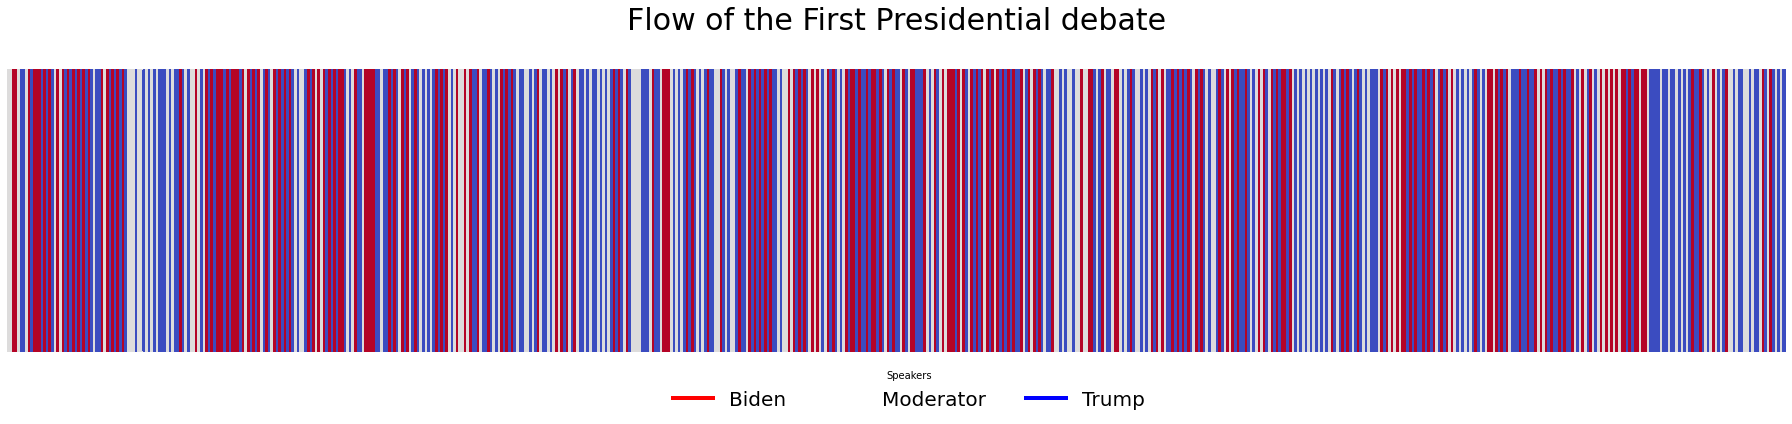

In [23]:
plt.figure(figsize = (25,6))

ax = sns.heatmap(df_copy_pivot,xticklabels=False,yticklabels=False,cmap='coolwarm',cbar=False);

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#ffffff', lw=4),
                Line2D([0], [0], color='#0000ff', lw=4)]
ax.legend(custom_lines,['Biden','Moderator','Trump'],bbox_to_anchor=(0.65, 0),title='Speakers',ncol=3,prop={'size': 20},frameon=False).get_frame().set_facecolor('#f5f7fa')

plt.xlabel('')
plt.ylabel('')
plt.title('Flow of the First Presidential debate',size=30,pad=40)
plt.tight_layout()
# plt.savefig('abc.jpg')

In [24]:
d = pd.read_csv('data/csv/us_election_2020_2nd_presidential_debate.csv')

In [25]:
d1 = d.iloc[0:89,:]
d2 = d.iloc[89:337,:]
d3 = d.iloc[337:,:]

In [26]:
calc_diff(d1)
calc_diff(d2)
calc_diff(d3)
print('\n')

In [27]:
frames = [d1,d2,d3]

In [28]:
d = pd.concat(frames)

In [29]:
d.drop(['seconds','minute'],axis=1,inplace=True)

In [30]:
d['tem']=d['seconds_spoken'].cumsum()

In [31]:
d.head()

,speaker,text,seconds_spoken,tem
0,Kristen Welker,"Good evening, everyone. Good evening. Thank yo...",439.0,439.0
1,Donald Trump,How are you doing? How are you?,21.0,460.0
2,Kristen Welker,And I do want to say a very good evening to bo...,29.0,489.0
3,Kristen Welker,The goal is for you to hear each other and for...,36.0,525.0
4,Kristen Welker,… during this next stage of the coronavirus cr...,1.0,526.0


In [32]:
d_copy = d.copy()

In [33]:
d_copy.speaker.value_counts()

Donald Trump      190
Kristen Welker    189
Joe Biden         133
Name: speaker, dtype: int64

In [34]:
d_copy.loc[d_copy['speaker'] == 'Kristen Welker','speaker'] = 1
d_copy.loc[d_copy['speaker'] == 'Donald Trump','speaker'] = 0
d_copy.loc[d_copy['speaker'] == 'Joe Biden','speaker'] = 2

In [35]:
d_copy.drop(columns=['text','seconds_spoken'],inplace=True)

In [36]:
d_copy.reset_index(drop=True,inplace=True)

In [37]:
d_copy['tem'] = d_copy['tem'].apply(lambda x : int(x))

In [38]:
d_copy.set_index('tem',inplace=True)

In [39]:
d_copy_pivot = d_copy.pivot_table(values='speaker',columns='tem',aggfunc='first')

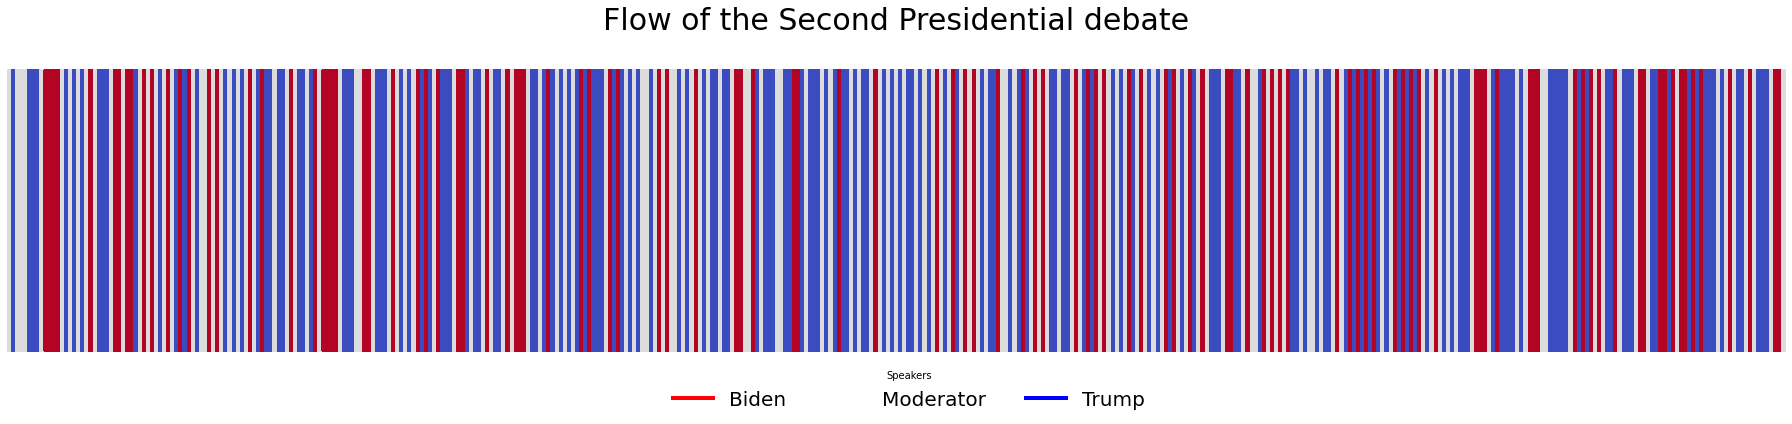

In [40]:
plt.figure(figsize = (25,6))

ax = sns.heatmap(d_copy_pivot,xticklabels=False,yticklabels=False,cmap='coolwarm',cbar=False);

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#ffffff', lw=4),
                Line2D([0], [0], color='#0000ff', lw=4)]
ax.legend(custom_lines,['Biden','Moderator','Trump'],bbox_to_anchor=(0.65, 0),title='Speakers',ncol=3,prop={'size': 20},frameon=False).get_frame().set_facecolor('#f5f7fa')

plt.xlabel('')
plt.ylabel('')
plt.title('Flow of the Second Presidential debate',size=30,pad=40)
plt.tight_layout()
# plt.savefig('abc.jpg')

In [41]:
vp = pd.read_csv('data/csv/us_election_2020_vice_presidential_debate.csv')

In [42]:
vp1 = vp.iloc[0:135,:]
vp2 = vp.iloc[135:,:]

In [43]:
calc_diff(vp1)
calc_diff(vp2)
print('\n')

In [44]:
frames = [vp1,vp2]

In [45]:
vp = pd.concat(frames)

In [46]:
vp.drop(['seconds','minute'],axis=1,inplace=True)

In [47]:
vp['tem']=vp['seconds_spoken'].cumsum()

In [48]:
vp_copy = vp.copy()

In [49]:
vp_copy.speaker.value_counts()

Susan Page        119
Mike Pence        114
Kamala Harris      51
Kamala Harris      43
Name: speaker, dtype: int64

In [50]:
vp_copy.loc[vp_copy['speaker'] == 'Mike Pence','speaker'] = 0
vp_copy.loc[vp_copy['speaker'] == 'Susan Page','speaker'] = 1
vp_copy.loc[vp_copy['speaker'] == 'Kamala Harris','speaker'] = 2
vp_copy.loc[vp_copy['speaker'] == 'Kamala Harris ','speaker'] = 2

In [51]:
vp_copy.drop(columns=['text','seconds_spoken'],inplace=True)

In [52]:
vp_copy.reset_index(drop=True,inplace=True)

In [53]:
vp_copy['tem'] = vp_copy['tem'].apply(lambda x : int(x))

In [54]:
vp_copy.set_index('tem',inplace=True)

In [55]:
vp_copy.speaker.value_counts()

1    119
0    114
2     94
Name: speaker, dtype: int64

In [56]:
vp_copy_pivot = vp_copy.pivot_table(values='speaker',columns='tem',aggfunc='first')

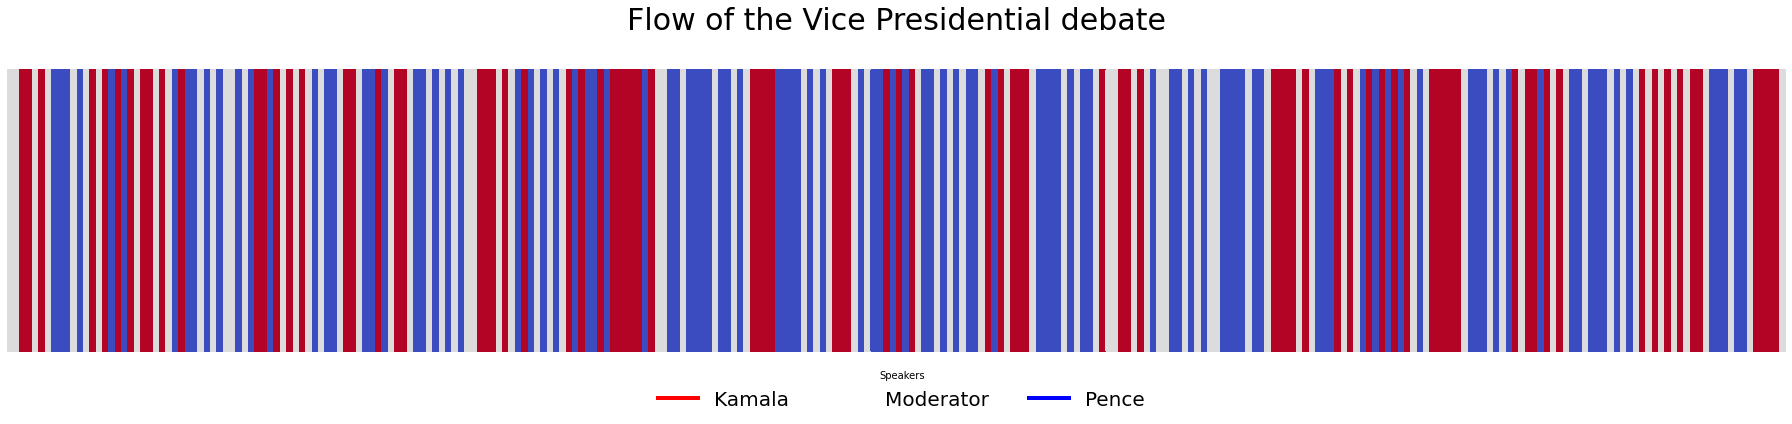

In [57]:
plt.figure(figsize = (25,6))

ax = sns.heatmap(vp_copy_pivot,xticklabels=False,yticklabels=False,cmap='coolwarm',cbar=False);

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#ff0000', lw=4),
                Line2D([0], [0], color='#ffffff', lw=4),
                Line2D([0], [0], color='#0000ff', lw=4)]
ax.legend(custom_lines,['Kamala','Moderator','Pence'],bbox_to_anchor=(0.65, 0),title='Speakers',ncol=3,prop={'size': 20},frameon=False).get_frame().set_facecolor('#f5f7fa')

plt.xlabel('')
plt.ylabel('')
plt.title('Flow of the Vice Presidential debate',size=30,pad=40)
plt.tight_layout()
# plt.savefig('abc.jpg')